In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD, Adam
import matplotlib .pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob

from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

In [144]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.datasets import load_iris, fetch_california_housing, load_breast_cancer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, SVR
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import mean_squared_error

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.cluster import KMeans

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore") # 워닝소리 미전시

In [89]:
df = pd.read_csv("farm1_env_time_sort.csv", encoding = "utf-8")
df

,날짜,설정EC(dS),현재EC(dS),설정PH(pH),현재PH(pH),현재일사(W),누적일사(J),J/Day,EC급액,pH급액,내부CO2,습도,평균온도
0,2021-10-1 0,2.8,3.300000,5.0,3.900000,0.000000,0.000000,2043.0,NaN,NaN,NaN,NaN,NaN
1,2021-10-1 1,2.8,3.300000,5.0,3.776667,0.000000,0.000000,2043.0,NaN,NaN,NaN,NaN,NaN
2,2021-10-1 10,2.8,2.820000,5.0,5.026667,671.166667,484.600000,2043.0,NaN,NaN,NaN,NaN,NaN
3,2021-10-1 11,2.8,2.953333,5.0,5.116667,761.000000,749.800000,2043.0,NaN,NaN,NaN,NaN,NaN
4,2021-10-1 12,2.8,2.836667,5.0,5.160000,779.033333,1035.566667,2043.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2021-11-28 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650375,5.651925,526.306452,99.610391,18.079409
3645,2021-11-28 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.641410,5.652870,533.027174,99.680660,18.114946
3646,2021-11-28 03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.637748,5.652804,540.508380,99.636502,18.091229
3647,2021-11-28 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.633536,5.654611,549.405714,99.713423,18.058000


In [90]:
new_day = []
for i in df["날짜"].values:
    date, hour = i.split(" ")
    new_day.append(date.split("-")[0] + "-" + date.split("-")[1].zfill(2) + "-" + date.split("-")[2].zfill(2) + " " + hour.zfill(2))    

In [91]:
new_day

['2021-10-01 00',
 '2021-10-01 01',
 '2021-10-01 10',
 '2021-10-01 11',
 '2021-10-01 12',
 '2021-10-01 13',
 '2021-10-01 14',
 '2021-10-01 15',
 '2021-10-01 16',
 '2021-10-01 17',
 '2021-10-01 18',
 '2021-10-01 19',
 '2021-10-01 02',
 '2021-10-01 20',
 '2021-10-01 21',
 '2021-10-01 22',
 '2021-10-01 23',
 '2021-10-01 03',
 '2021-10-01 04',
 '2021-10-01 05',
 '2021-10-01 06',
 '2021-10-01 07',
 '2021-10-01 08',
 '2021-10-01 09',
 '2021-10-10 00',
 '2021-10-10 01',
 '2021-10-10 10',
 '2021-10-10 11',
 '2021-10-10 12',
 '2021-10-10 13',
 '2021-10-10 14',
 '2021-10-10 15',
 '2021-10-10 16',
 '2021-10-10 17',
 '2021-10-10 18',
 '2021-10-10 19',
 '2021-10-10 02',
 '2021-10-10 20',
 '2021-10-10 21',
 '2021-10-10 22',
 '2021-10-10 23',
 '2021-10-10 03',
 '2021-10-10 04',
 '2021-10-10 05',
 '2021-10-10 06',
 '2021-10-10 07',
 '2021-10-10 08',
 '2021-10-10 09',
 '2021-10-11 00',
 '2021-10-11 01',
 '2021-10-11 10',
 '2021-10-11 11',
 '2021-10-11 12',
 '2021-10-11 13',
 '2021-10-11 14',
 '2021-10-

In [92]:
df["날짜"] = new_day

In [93]:
df["날짜"] = pd.to_datetime(df["날짜"])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        3649 non-null   datetime64[ns]
 1   설정EC(dS)  3438 non-null   float64       
 2   현재EC(dS)  3438 non-null   float64       
 3   설정PH(pH)  3438 non-null   float64       
 4   현재PH(pH)  3438 non-null   float64       
 5   현재일사(W)   3438 non-null   float64       
 6   누적일사(J)   3438 non-null   float64       
 7   J/Day     3438 non-null   float64       
 8   EC급액      461 non-null    float64       
 9   pH급액      461 non-null    float64       
 10  내부CO2     461 non-null    float64       
 11  습도        461 non-null    float64       
 12  평균온도      461 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 370.7 KB


In [95]:
df.columns

Index(['날짜', '설정EC(dS)', '현재EC(dS)', '설정PH(pH)', '현재PH(pH)', '현재일사(W)',
       '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도'],
      dtype='object')

In [96]:
# 원본 describe
df.describe()
# J/day, ph급액

,설정EC(dS),현재EC(dS),설정PH(pH),현재PH(pH),현재일사(W),누적일사(J),J/Day,EC급액,pH급액,내부CO2,습도,평균온도
count,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,2.780644,3.021665,4.802090,4.244218,120.776478,482.971832,941.977996,5.470293,35.822693,499.818069,93.452395,19.880556
std,0.059098,0.265806,0.172862,0.593897,198.015512,547.137013,560.974278,6.430074,647.344140,92.214786,6.432891,4.392705
min,2.600000,0.996667,4.500000,3.200000,0.000000,0.000000,0.000000,2.575120,4.880526,260.560976,76.141049,15.618351
25%,2.800000,2.810000,4.800000,3.643333,0.000000,0.000000,527.000000,4.650375,5.598420,442.345550,88.663375,17.157500
50%,2.800000,3.000000,4.800000,4.346667,0.000000,256.000000,1040.000000,5.118778,5.695741,512.858696,92.716681,17.914400
75%,2.800000,3.203333,5.000000,4.800000,187.025000,946.000000,1301.000000,6.066247,5.796851,561.409574,99.663125,20.943448
max,2.800000,3.796667,5.000000,5.346667,857.100000,2227.000000,2227.000000,140.997136,13904.739921,786.000000,100.000000,35.248451


In [97]:
df_1 = df[df.columns[0]]
df_2 = df[df.columns[1:]]

In [98]:
df_2.shape

(3649, 12)

# 1) KNN imputer

In [99]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1 = imputer.fit_transform(df_2)
df1

array([[  2.8       ,   3.3       ,   5.        , ..., 506.09148619,
         90.77279251,  21.36924641],
       [  2.8       ,   3.3       ,   5.        , ..., 506.09148619,
         90.77279251,  21.36924641],
       [  2.8       ,   2.82      ,   5.        , ..., 572.06845399,
         88.89949557,  28.5037978 ],
       ...,
       [  2.68      ,   3.08466667,   4.56      , ..., 540.50837989,
         99.6365024 ,  18.09122905],
       [  2.72      ,   3.09066667,   4.56      , ..., 549.40571429,
         99.71342257,  18.058     ],
       [  2.72      ,   3.00666667,   4.56      , ..., 551.13888889,
         99.72592597,  18.47138889]])

In [100]:
df3 = pd.concat([df_1, pd.DataFrame(df1)], axis = 1)
df3.columns = ['날짜', '설정EC(dS)', '현재EC(dS)', '설정PH(pH)', '현재PH(pH)', '현재일사(W)',
       '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']

In [101]:
cols = ['현재EC(dS)', '현재PH(pH)', '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']
df_ori = df[cols]
df_knn = df3[cols]

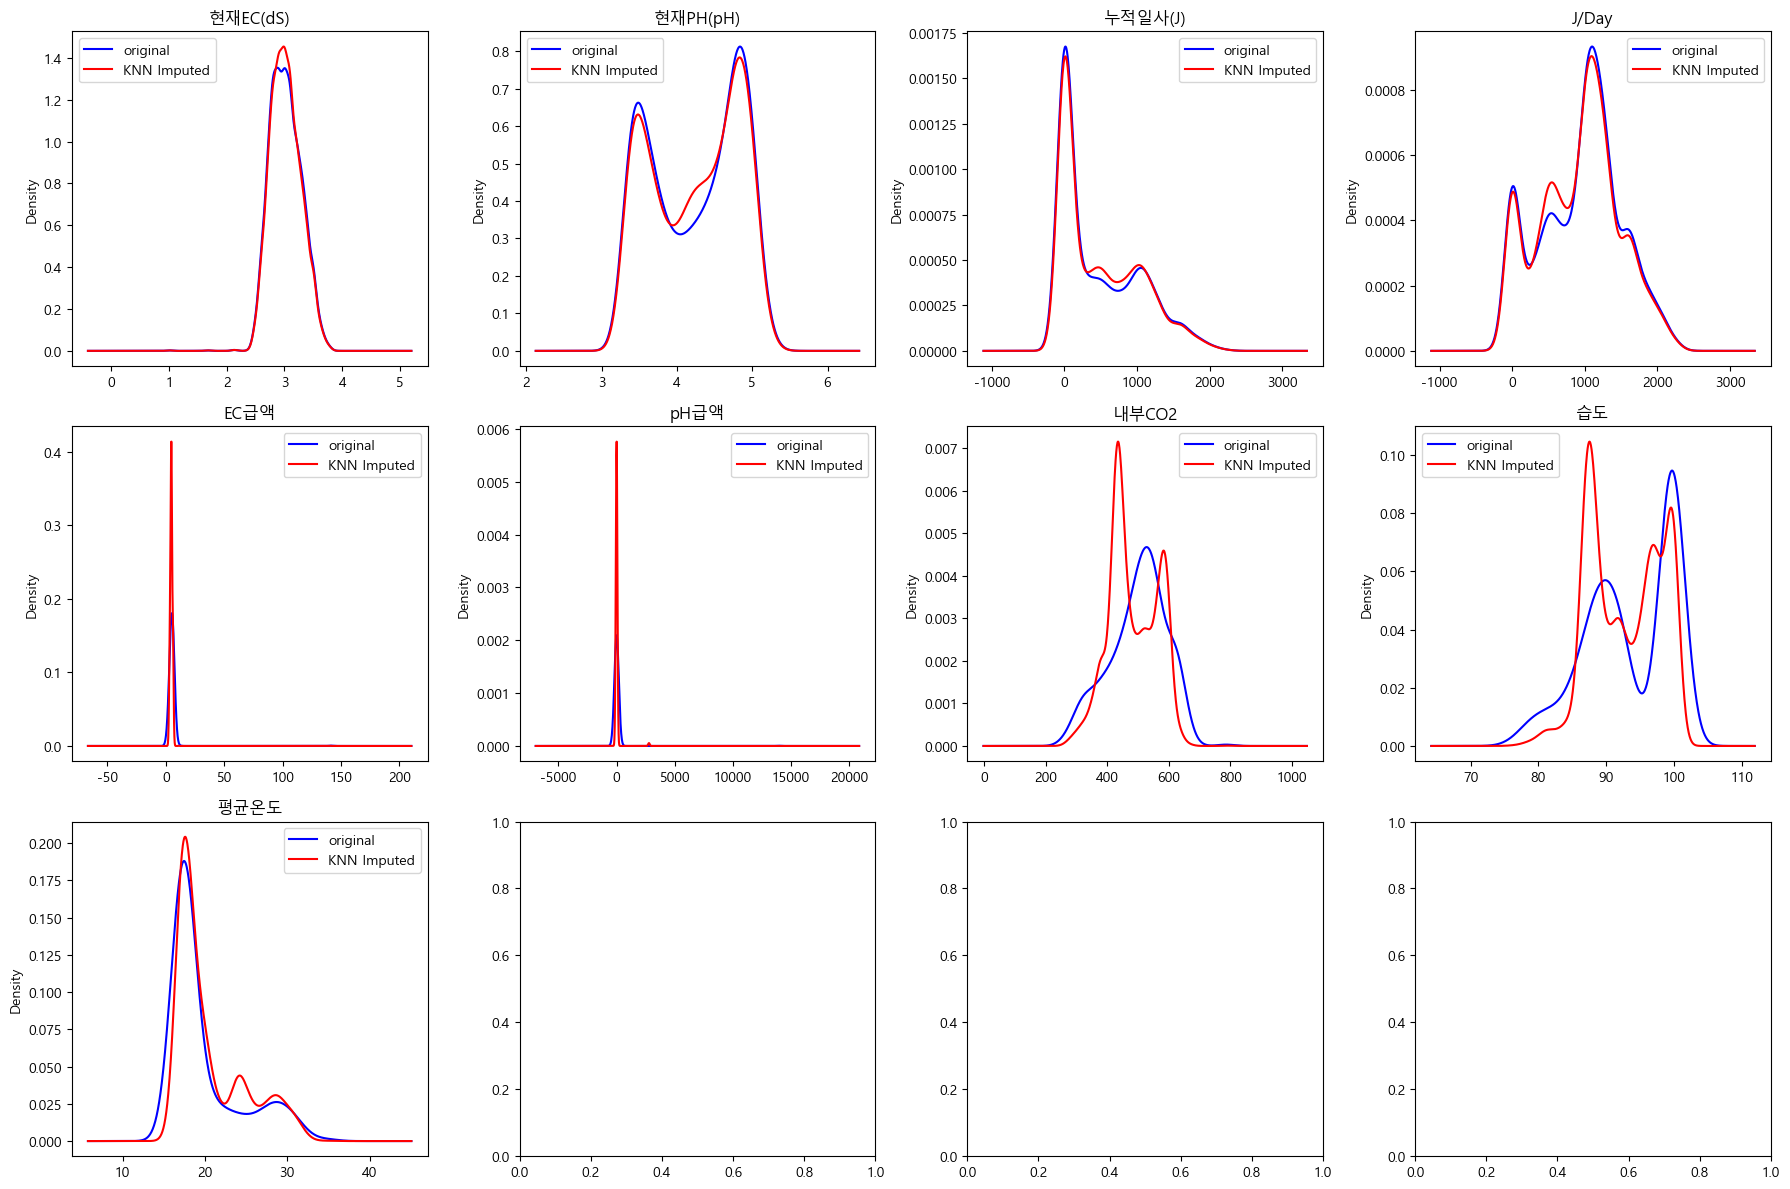

In [103]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(df_ori.columns, df_knn.columns)):
    ax = axis[i//4, i%4]
    df_ori[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    df_knn[column2].plot(kind = "kde", ax = ax, color = "red", label = "KNN Imputed")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

# 2) 다변량 대치 (Iterative Imputer)

In [107]:
df_1
df_2

,설정EC(dS),현재EC(dS),설정PH(pH),현재PH(pH),현재일사(W),누적일사(J),J/Day,EC급액,pH급액,내부CO2,습도,평균온도
0,2.8,3.300000,5.0,3.900000,0.000000,0.000000,2043.0,NaN,NaN,NaN,NaN,NaN
1,2.8,3.300000,5.0,3.776667,0.000000,0.000000,2043.0,NaN,NaN,NaN,NaN,NaN
2,2.8,2.820000,5.0,5.026667,671.166667,484.600000,2043.0,NaN,NaN,NaN,NaN,NaN
3,2.8,2.953333,5.0,5.116667,761.000000,749.800000,2043.0,NaN,NaN,NaN,NaN,NaN
4,2.8,2.836667,5.0,5.160000,779.033333,1035.566667,2043.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650375,5.651925,526.306452,99.610391,18.079409
3645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.641410,5.652870,533.027174,99.680660,18.114946
3646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.637748,5.652804,540.508380,99.636502,18.091229
3647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.633536,5.654611,549.405714,99.713423,18.058000


In [108]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state = 0)
df_2_raw = imputer.fit_transform(df_2)
df_2_raw


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[  2.8       ,   3.3       ,   5.        , ..., 558.05855008,
         97.36441235,  15.15840848],
       [  2.8       ,   3.3       ,   5.        , ..., 558.04217531,
         96.65355774,  15.10396796],
       [  2.8       ,   2.82      ,   5.        , ..., 468.23621387,
         85.67977669,  31.7661312 ],
       ...,
       [  2.73635795,   3.24138946,   4.73883857, ..., 540.50837989,
         99.6365024 ,  18.09122905],
       [  2.73439958,   3.24403524,   4.73570562, ..., 549.40571429,
         99.71342257,  18.058     ],
       [  2.73329133,   3.24317031,   4.74233351, ..., 551.13888889,
         99.72592597,  18.47138889]])

In [110]:
df_iter = pd.concat([df_1, pd.DataFrame(df_2_raw)], axis = 1)
df_iter.columns = ['날짜', '설정EC(dS)', '현재EC(dS)', '설정PH(pH)', '현재PH(pH)', '현재일사(W)',
       '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']

In [111]:
cols = ['현재EC(dS)', '현재PH(pH)', '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']
df_ori = df[cols]
df_iter = df_iter[cols]

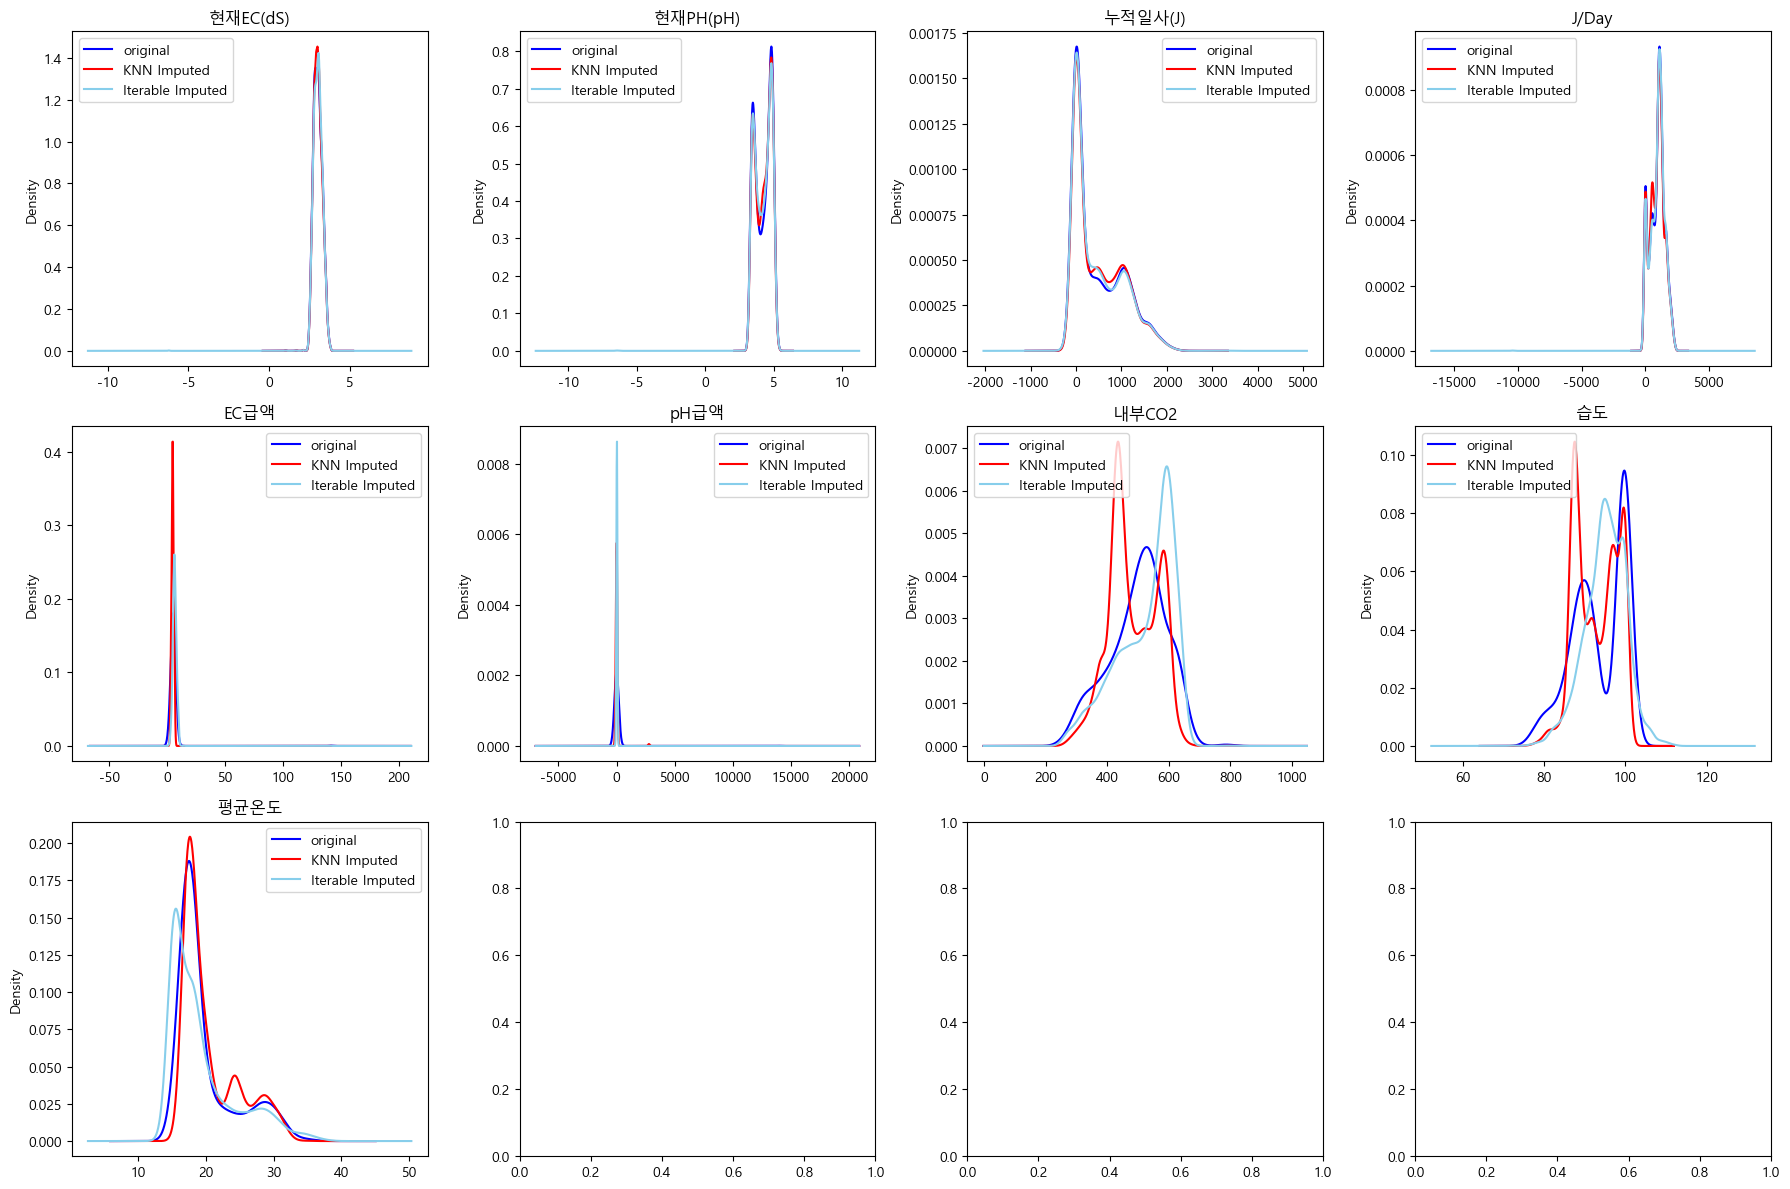

In [114]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (18, 12))

for i, (col1, col2, col3) in enumerate(zip(df_ori.columns, df_knn.columns, df_iter.columns)):
    ax = axis[i//4, i%4]
    df_ori[col1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    df_knn[col2].plot(kind = "kde", ax = ax, color = "red", label = "KNN Imputed")
    df_iter[col3].plot(kind = "kde", ax = ax, color = "skyblue", label = "Iterable Imputed")
    ax.set_title(col1)
    ax.legend()
    
plt.tight_layout()

# 3) 평균값, 중앙값, 최빈값  대체

In [116]:
df_1
df_2

,설정EC(dS),현재EC(dS),설정PH(pH),현재PH(pH),현재일사(W),누적일사(J),J/Day,EC급액,pH급액,내부CO2,습도,평균온도
0,2.8,3.300000,5.0,3.900000,0.000000,0.000000,2043.0,NaN,NaN,NaN,NaN,NaN
1,2.8,3.300000,5.0,3.776667,0.000000,0.000000,2043.0,NaN,NaN,NaN,NaN,NaN
2,2.8,2.820000,5.0,5.026667,671.166667,484.600000,2043.0,NaN,NaN,NaN,NaN,NaN
3,2.8,2.953333,5.0,5.116667,761.000000,749.800000,2043.0,NaN,NaN,NaN,NaN,NaN
4,2.8,2.836667,5.0,5.160000,779.033333,1035.566667,2043.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650375,5.651925,526.306452,99.610391,18.079409
3645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.641410,5.652870,533.027174,99.680660,18.114946
3646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.637748,5.652804,540.508380,99.636502,18.091229
3647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.633536,5.654611,549.405714,99.713423,18.058000


In [117]:
from sklearn.impute import SimpleImputer
v_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
df_2_raw = v_mean.fit_transform(df_2)
df_2_raw

array([[  2.8       ,   3.3       ,   5.        , ..., 499.81806948,
         93.45239535,  19.8805556 ],
       [  2.8       ,   3.3       ,   5.        , ..., 499.81806948,
         93.45239535,  19.8805556 ],
       [  2.8       ,   2.82      ,   5.        , ..., 499.81806948,
         93.45239535,  19.8805556 ],
       ...,
       [  2.78064379,   3.0216647 ,   4.80209036, ..., 540.50837989,
         99.6365024 ,  18.09122905],
       [  2.78064379,   3.0216647 ,   4.80209036, ..., 549.40571429,
         99.71342257,  18.058     ],
       [  2.78064379,   3.0216647 ,   4.80209036, ..., 551.13888889,
         99.72592597,  18.47138889]])

In [118]:
df_mean = pd.concat([df_1, pd.DataFrame(df_2_raw)], axis = 1)
df_mean.columns = ['날짜', '설정EC(dS)', '현재EC(dS)', '설정PH(pH)', '현재PH(pH)', '현재일사(W)',
       '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']

In [119]:
cols = ['현재EC(dS)', '현재PH(pH)', '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']
df_mean = df_mean[cols]

In [121]:
from sklearn.impute import SimpleImputer
v_median = SimpleImputer(missing_values=np.nan, strategy="median")
df_2_raw = v_median.fit_transform(df_2)
df_2_raw

array([[  2.8       ,   3.3       ,   5.        , ..., 512.85869565,
         92.71668072,  17.9144    ],
       [  2.8       ,   3.3       ,   5.        , ..., 512.85869565,
         92.71668072,  17.9144    ],
       [  2.8       ,   2.82      ,   5.        , ..., 512.85869565,
         92.71668072,  17.9144    ],
       ...,
       [  2.8       ,   3.        ,   4.8       , ..., 540.50837989,
         99.6365024 ,  18.09122905],
       [  2.8       ,   3.        ,   4.8       , ..., 549.40571429,
         99.71342257,  18.058     ],
       [  2.8       ,   3.        ,   4.8       , ..., 551.13888889,
         99.72592597,  18.47138889]])

In [122]:
df_median = pd.concat([df_1, pd.DataFrame(df_2_raw)], axis = 1)
df_median.columns = ['날짜', '설정EC(dS)', '현재EC(dS)', '설정PH(pH)', '현재PH(pH)', '현재일사(W)',
       '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']

In [123]:
cols = ['현재EC(dS)', '현재PH(pH)', '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']
df_median = df_median[cols]

In [125]:
from sklearn.impute import SimpleImputer
v_frequency = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_2_raw = v_frequency.fit_transform(df_2)
df_2_raw

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[  2.8       ,   3.3       ,   5.        , ..., 260.56097561,
        100.        ,  15.61835052],
       [  2.8       ,   3.3       ,   5.        , ..., 260.56097561,
        100.        ,  15.61835052],
       [  2.8       ,   2.82      ,   5.        , ..., 260.56097561,
        100.        ,  15.61835052],
       ...,
       [  2.8       ,   3.1       ,   4.8       , ..., 540.50837989,
         99.6365024 ,  18.09122905],
       [  2.8       ,   3.1       ,   4.8       , ..., 549.40571429,
         99.71342257,  18.058     ],
       [  2.8       ,   3.1       ,   4.8       , ..., 551.13888889,
         99.72592597,  18.47138889]])

In [126]:
df_most_frequent = pd.concat([df_1, pd.DataFrame(df_2_raw)], axis = 1)
df_most_frequent.columns = ['날짜', '설정EC(dS)', '현재EC(dS)', '설정PH(pH)', '현재PH(pH)', '현재일사(W)',
       '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']

In [127]:
cols = ['현재EC(dS)', '현재PH(pH)', '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2', '습도', '평균온도']
df_most_frequent = df_most_frequent[cols]

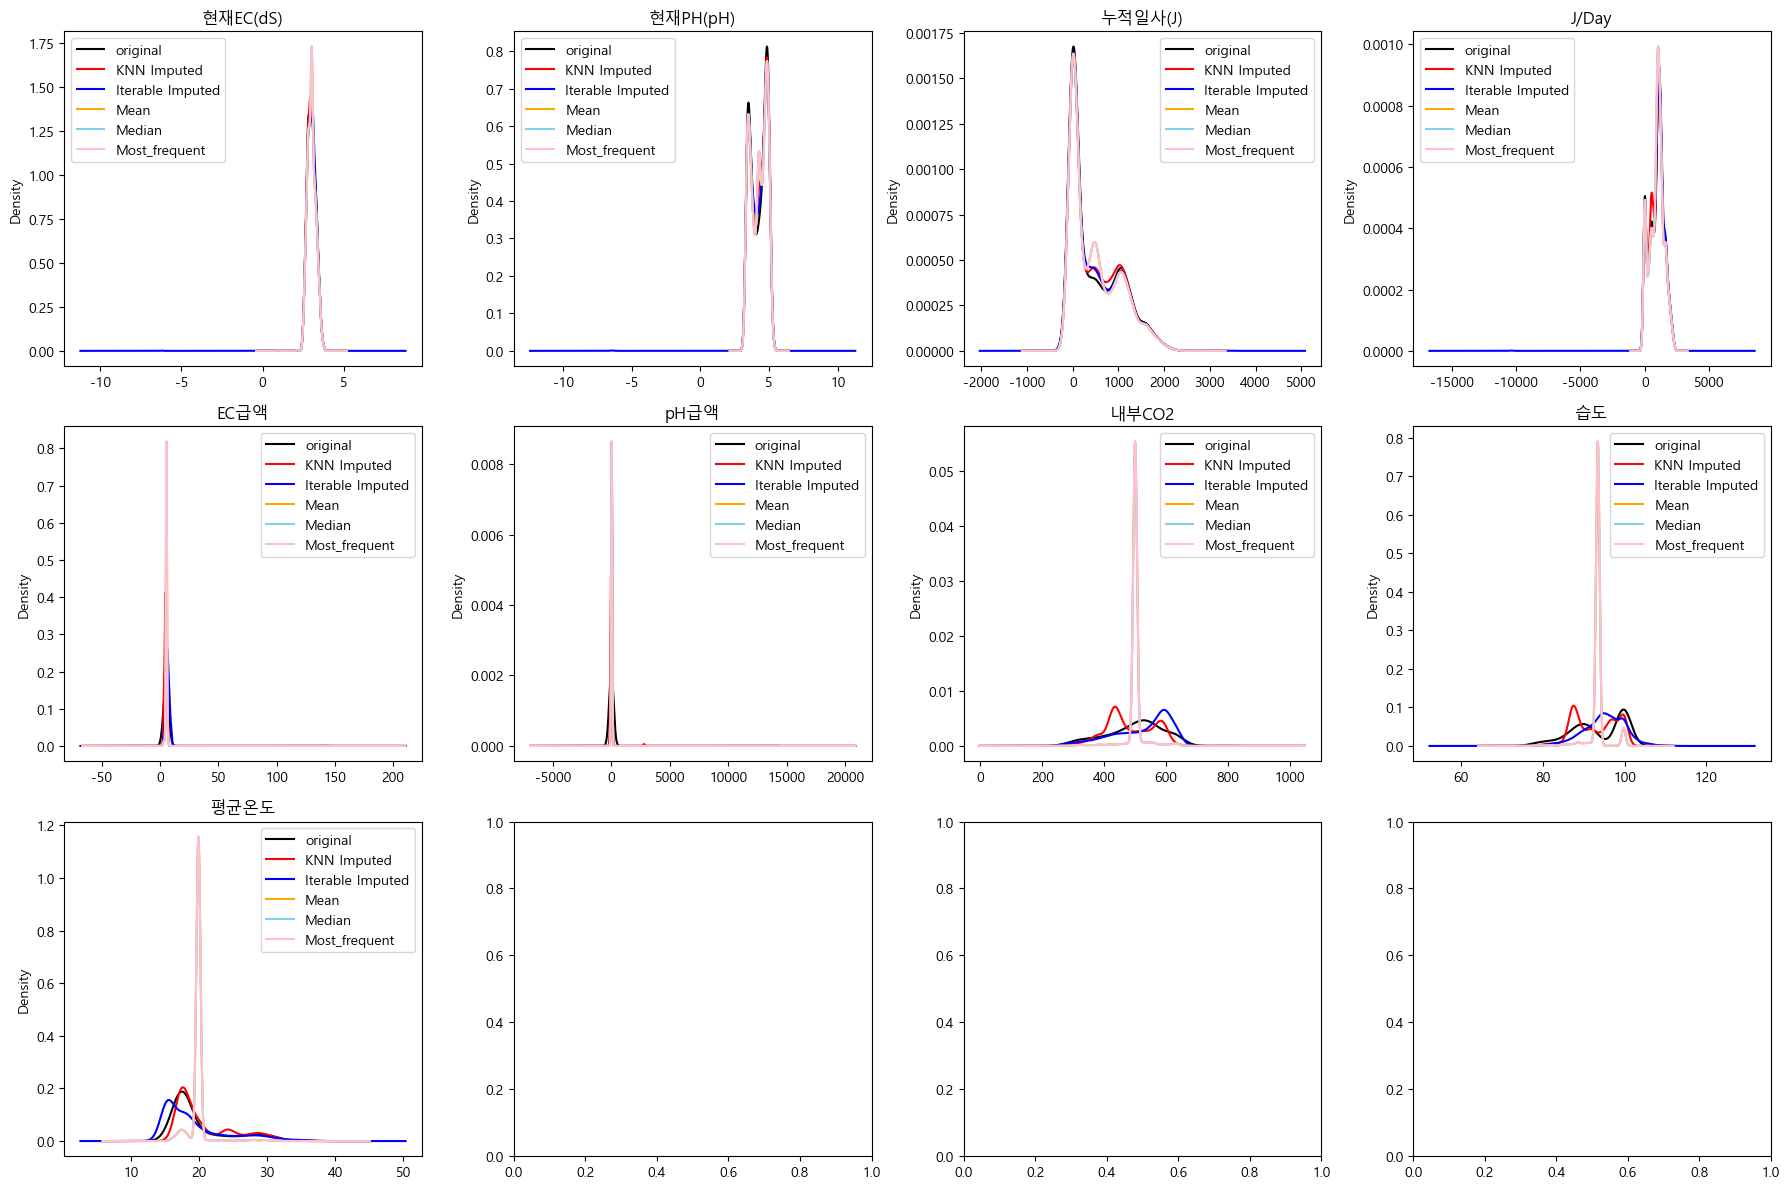

In [129]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (18, 12))

for i, (col1, col2, col3, col4, col5, col6) in enumerate(zip(df_ori.columns, df_knn.columns, df_iter.columns, df_mean.columns, df_median.columns, df_most_frequent)):
    ax = axis[i//4, i%4]
    df_ori[col1].plot(kind = "kde", ax = ax, color = "black", label = 'original')
    df_knn[col2].plot(kind = "kde", ax = ax, color = "red", label = "KNN Imputed")
    df_iter[col3].plot(kind = "kde", ax = ax, color = "blue", label = "Iterable Imputed")
    df_mean[col4].plot(kind = "kde", ax = ax, color = "orange", label = "Mean")
    df_mean[col5].plot(kind = "kde", ax = ax, color = "skyblue", label = "Median")
    df_mean[col6].plot(kind = "kde", ax = ax, color = "pink", label = "Most_frequent")
    ax.set_title(col1)
    ax.legend()
    
plt.tight_layout()

In [134]:
df_knn.to_csv("farm1_env_knn.csv", encoding = "utf-8", index=False)

In [137]:
df_knn.columns

Index(['현재EC(dS)', '현재PH(pH)', '누적일사(J)', 'J/Day', 'EC급액', 'pH급액', '내부CO2',
       '습도', '평균온도'],
      dtype='object')

### 1) 이상치확인

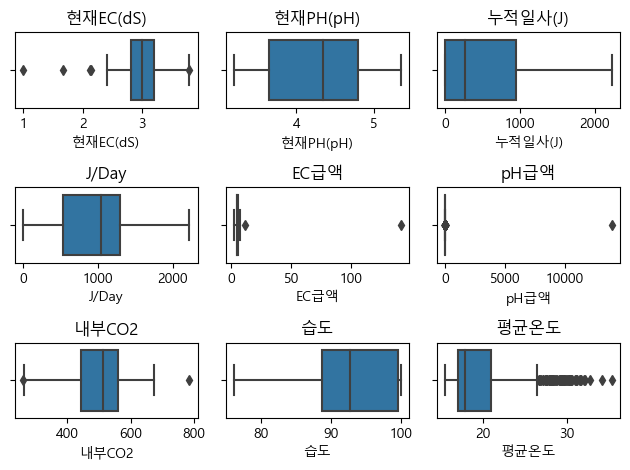

In [155]:
# origin
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_ori[df_ori.columns[i]])
    plt.title(df_ori.columns[i])
plt.tight_layout()

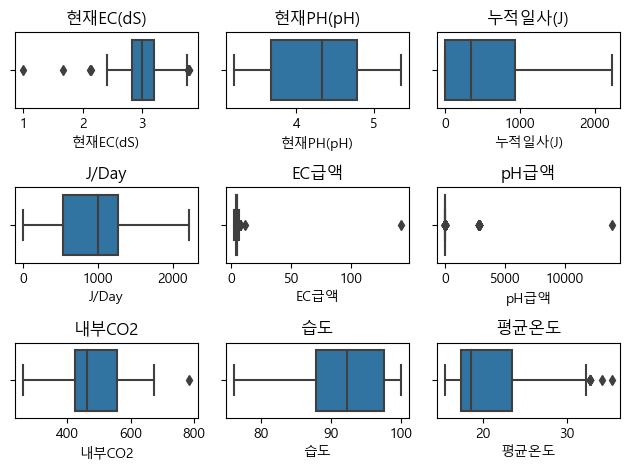

In [145]:
# knn imputer
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_knn[df_knn.columns[i]])
    plt.title(df_knn.columns[i])
plt.tight_layout()

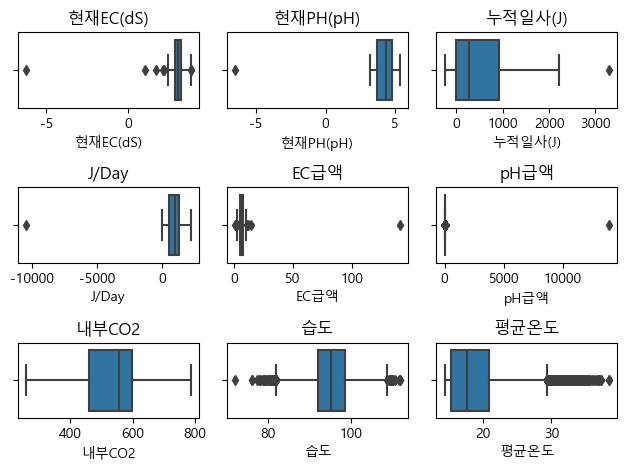

In [154]:
# iterable imputer
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_iter[df_iter.columns[i]])
    plt.title(df_iter.columns[i])
plt.tight_layout()

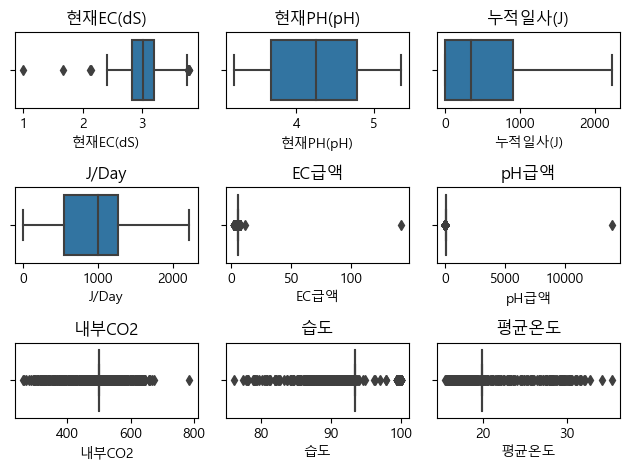

In [153]:
# mean
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_mean[df_mean.columns[i]])
    plt.title(df_mean.columns[i])
plt.tight_layout()

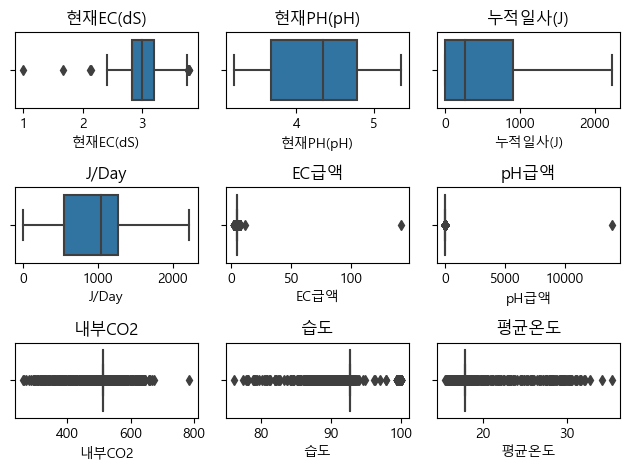

In [152]:
# median
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_median[df_median.columns[i]])
    plt.title(df_median.columns[i])
plt.tight_layout()

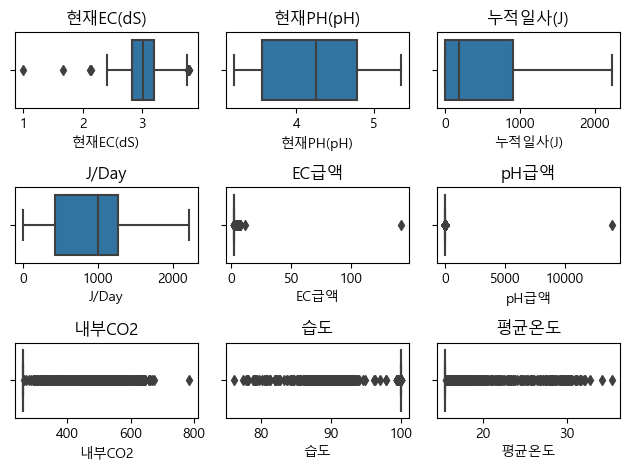

In [151]:
# most_frequent
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_most_frequent[df_most_frequent.columns[i]])
    plt.title(df_most_frequent.columns[i])
plt.tight_layout()